# 課後作業

# 資料匯入

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['font.family']='SimHei'
plt.rcParams['axes.unicode_minus']=False

pd.set_option("display.max_columns",50)
pd.set_option("display.html.table_schema",True)
df_ml = pd.read_csv('tw_house.csv', encoding='big5') #台北市
df_ml.sample(5) #隨機取其中5筆資料


,鄉鎮市區,土地移轉總面積平方公尺,建物移轉總面積平方公尺,單價每平方公尺,建物現況格局-房,建物現況格局-廳,建物現況格局-衛,車位移轉總面積平方公尺,車位總價元,屋齡,建築完成年,交易年,總價元,中山區,中正區,信義區,內湖區,北投區,南港區,士林區,大同區,大安區,文山區,松山區,萬華區
322,信義區,121.69,581.33,231372,2,3,3,69.6,4000000,1,105,104,12240.0,0,0,1,0,0,0,0,0,0,0,0,0
136,中山區,9.09,69.51,159977,2,1,1,0.0,0,22,84,106,1112.0,1,0,0,0,0,0,0,0,0,0,0,0
95,中正區,0.67,11.22,89127,0,0,0,0.0,0,36,70,106,100.0,0,1,0,0,0,0,0,0,0,0,0,0
330,萬華區,2.37,27.79,172724,1,0,1,0.0,0,21,85,106,480.0,0,0,0,0,0,0,0,0,0,0,0,1
61,內湖區,28.79,99.49,117600,3,2,2,0.0,0,37,69,106,1170.0,0,0,0,1,0,0,0,0,0,0,0,0


# 檢查特徵相關性及線性關係

In [2]:
# 把DataFrame加上highlight背景色


def highlight_highcorr(s):
    is_high = ((s >= 0.5) & (s < 1))
    return ['background-color: yellow' if v else '' for v in is_high]

# 相關性分析

In [3]:
df_ml.corr().round(3).style.apply(highlight_highcorr)


,土地移轉總面積平方公尺,建物移轉總面積平方公尺,單價每平方公尺,建物現況格局-房,建物現況格局-廳,建物現況格局-衛,車位移轉總面積平方公尺,車位總價元,屋齡,建築完成年,交易年,總價元,中山區,中正區,信義區,內湖區,北投區,南港區,士林區,大同區,大安區,文山區,松山區,萬華區
土地移轉總面積平方公尺,1,0.678,0.069,0.34,0.22,0.242,0.39,0.348,-0.068,0.068,-0.009,0.515,-0.207,-0.107,0.039,0.157,0.06,0.08,0.121,-0.081,-0.056,0.116,-0.049,-0.109
建物移轉總面積平方公尺,0.678,1,0.272,0.197,0.06,0.153,0.736,0.625,-0.411,0.411,-0.083,0.862,-0.092,-0.021,0.033,0.121,0.018,0.092,0.062,-0.03,-0.001,-0.003,-0.058,-0.132
單價每平方公尺,0.069,0.272,1,-0.081,-0.007,0.018,0.26,0.368,-0.362,0.362,-0.046,0.567,0.056,0.05,0.084,-0.05,-0.13,0.006,0.04,-0.067,0.317,-0.125,0.096,-0.203
建物現況格局-房,0.34,0.197,-0.081,1,0.675,0.755,0.032,-0.008,0.097,-0.097,-0.041,0.069,-0.084,-0.117,-0.036,0.122,-0.039,0.017,0.021,-0.01,0.016,0.073,0.024,-0.022
建物現況格局-廳,0.22,0.06,-0.007,0.675,1,0.582,-0.043,-0.08,0.046,-0.046,-0.006,-0.015,-0.046,-0.15,-0.06,0.069,-0.031,0.028,0.052,-0.019,0.048,0.071,0.052,-0.04
建物現況格局-衛,0.242,0.153,0.018,0.755,0.582,1,0.015,-0.012,-0.031,0.031,-0.084,0.067,-0.011,-0.121,0.007,0.081,-0.035,0.034,0.039,-0.037,0.042,0.049,-0.032,-0.058
車位移轉總面積平方公尺,0.39,0.736,0.26,0.032,-0.043,0.015,1,0.739,-0.464,0.464,-0.086,0.631,-0.041,-0.049,0.005,0.101,0.066,0.053,0.046,-0.023,-0.016,0.014,-0.094,-0.106
車位總價元,0.348,0.625,0.368,-0.008,-0.08,-0.012,0.739,1,-0.359,0.359,-0.053,0.683,0.017,-0.021,-0.01,0.007,0.053,0.027,0.09,-0.031,-0.013,-0.012,-0.045,-0.087
屋齡,-0.068,-0.411,-0.362,0.097,0.046,-0.031,-0.464,-0.359,1,-1,0.143,-0.403,-0.068,0.003,0.091,-0.097,-0.076,-0.12,0.113,-0.005,0.019,-0.105,0.155,0.149
建築完成年,0.068,0.411,0.362,-0.097,-0.046,0.031,0.464,0.359,-1,1,-0.143,0.403,0.068,-0.003,-0.091,0.097,0.076,0.12,-0.113,0.005,-0.019,0.105,-0.155,-0.149


# 散佈圖矩陣

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10e04b898>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1133ed4a8>]], dtype=object)

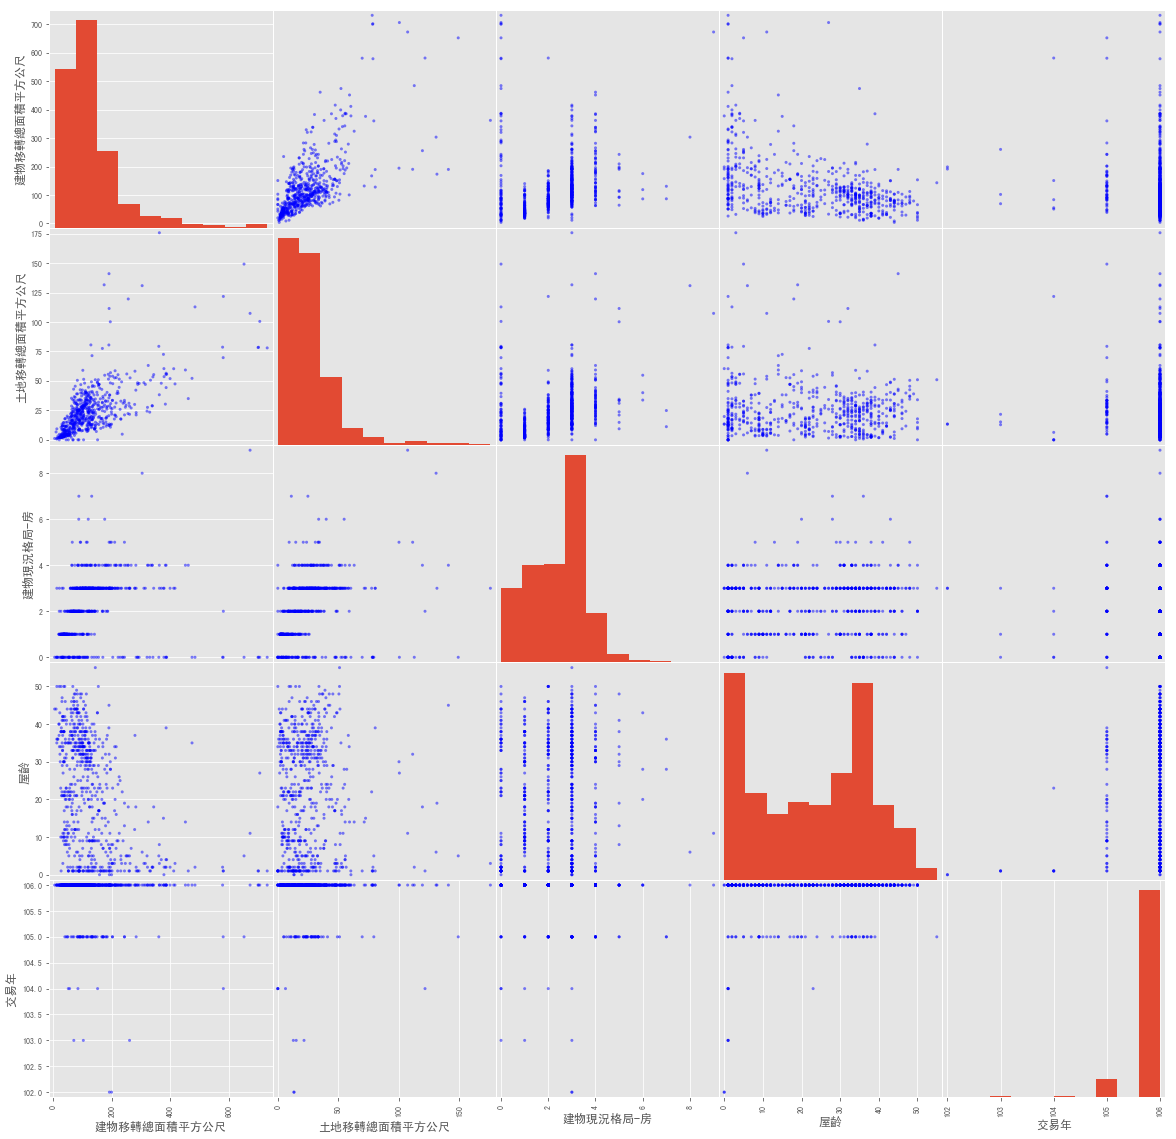

In [4]:
from pandas.plotting import scatter_matrix
scatter_matrix(df_ml[['建物移轉總面積平方公尺','土地移轉總面積平方公尺','建物現況格局-房','屋齡','交易年']],
               figsize=(20, 20),color='b')

# 建模前預處理

# 切分訓練資料及測試資料

In [5]:
#from sklearn.model_selection import train_test_split

from sklearn.model_selection import train_test_split

X = df_ml[['建物移轉總面積平方公尺','土地移轉總面積平方公尺','單價每平方公尺','建物現況格局-房','建物現況格局-廳','建物現況格局-衛','車位移轉總面積平方公尺','車位總價元','屋齡','建築完成年','交易年','中山區','中正區','信義區','內湖區',
           '北投區','南港區','士林區','大同區','大安區','文山區','松山區','萬華區']]


y = df_ml[['總價元']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

X_train.head()

,建物移轉總面積平方公尺,土地移轉總面積平方公尺,單價每平方公尺,建物現況格局-房,建物現況格局-廳,建物現況格局-衛,車位移轉總面積平方公尺,車位總價元,屋齡,建築完成年,交易年,中山區,中正區,信義區,內湖區,北投區,南港區,士林區,大同區,大安區,文山區,松山區,萬華區
291,66.74,0.00,78064,0,0,1,0.0,0,1,105,106,1,0,0,0,0,0,0,0,0,0,0,0
205,210.83,58.62,94863,3,2,2,0.0,0,20,86,106,0,0,0,0,0,0,1,0,0,0,0,0
487,64.14,16.29,318054,1,1,1,0.0,0,16,90,106,0,0,0,0,0,0,0,0,1,0,0,0
448,35.98,2.91,93783,1,1,1,0.0,0,38,68,106,1,0,0,0,0,0,0,0,0,0,0,0
282,86.73,25.98,92240,3,2,1,0.0,0,34,72,106,0,0,0,0,0,0,0,0,0,1,0,0


# 標準化

In [6]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
X_std = sc.transform(X)


# 產生高次方項

In [7]:
from sklearn.preprocessing import PolynomialFeatures
quadratic = PolynomialFeatures(degree=2)

X_train_poly = quadratic.fit_transform(X_train_std)
X_test_poly = quadratic.fit_transform(X_test_std)
X_poly = quadratic.fit_transform(X_std)


# plot_learning_curve function

In [8]:
# Scikit-Learn 官網作圖函式
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure(figsize=(10,6))  #調整作圖大小
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

Automatically created module for IPython interactive environment


# 線性迴歸

# 多變項

In [9]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train_std, y_train)

print('各變項參數:', lr.coef_)
print("MSE: %.2f" % np.mean((lr.predict(X_test_std) - y_test) ** 2))
print("R Square:",lr.score(X_test_std, y_test))


各變項參數: [[  2.44490577e+03  -2.47361684e+02   8.96977689e+02  -7.80424493e+01
   -2.40001999e+01   1.90985707e+01  -5.47584688e+02   7.10010293e+02
    9.79347324e+01  -9.79347324e+01   3.04004357e+01  -1.26667575e+00
   -3.70959328e+00  -1.01448241e+02  -2.45639401e+01   8.54480335e+00
    9.26216868e+00   1.36468850e+02  -3.57643033e+01  -2.97193965e+01
    3.48504585e+01  -6.44327315e+01   5.23214263e+01]]
MSE: 569121.18
R Square: 0.845532102499


<module 'matplotlib.pyplot' from '/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

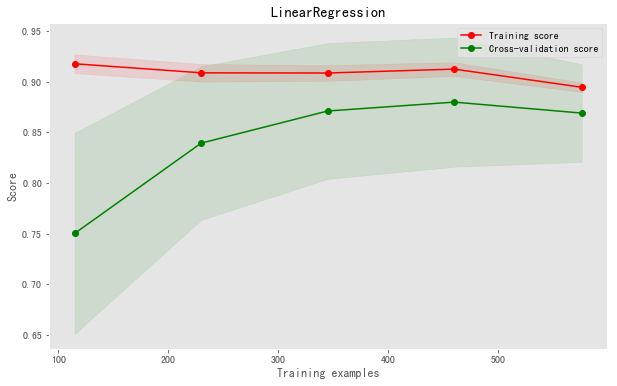

In [10]:
from sklearn.model_selection import KFold

cv = KFold(n_splits=10, random_state=None, shuffle=True)
estimator = LinearRegression()

plot_learning_curve(estimator, "LinearRegression", X_std, y, cv=cv, train_sizes=np.linspace(0.2, 1.0, 5))


# 非線性

In [11]:
lr = LinearRegression()
lr.fit(X_train_poly, y_train)


lr = LinearRegression()
lr.fit(X_train_poly, y_train)

print('各變項參數:', lr.coef_)
print("MSE: %.2f" % np.mean((lr.predict(X_test_poly) - y_test) ** 2))
print("R Square:",lr.score(X_test_poly, y_test))

各變項參數: [[  3.29214239e+09   1.91356866e+03  -1.71445226e+00   8.45984430e+02
    2.26660343e+00   2.32970656e-01   4.15354607e+00  -1.03268975e+02
   -1.29530236e+11   1.44709330e+12   1.44709330e+12  -3.71029803e+11
    4.79465370e+12  -2.99530672e+12  -1.24015431e+12   4.25964083e+11
   -7.30436197e+11  -3.31250211e+12  -1.73248246e+12  -1.81119908e+12
   -1.08019220e+12   4.24399695e+12  -1.81405061e+12  -6.30304895e+11
   -1.01125011e+01   2.67379475e+00   7.68414506e+02  -7.17016315e+00
    4.48958445e+00   1.36874158e+01   1.10559311e+01  -3.03681803e+01
    2.90222365e+11   2.90222365e+11   3.77952075e+00   1.33632247e+11
    8.91731916e+10   9.07016195e+10   1.42088701e+11   1.08043965e+11
    8.09706305e+10   1.00558880e+11   7.15936454e+10   8.26931934e+10
    1.06849245e+11   9.78796481e+10   1.03141431e+11  -1.47196293e+00
    1.90675750e+01   1.33481340e+01  -4.53753567e+00  -9.90186787e+00
    1.11379166e+01   5.44571161e+00  -1.64150768e+11  -1.64150768e+11
    5.5442948

<module 'matplotlib.pyplot' from '/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

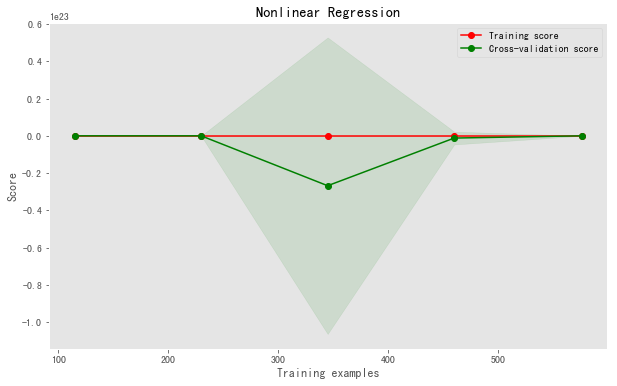

In [12]:
from sklearn.model_selection import KFold

cv = KFold(n_splits=10, random_state=None, shuffle=True)
estimator = LinearRegression()

plot_learning_curve(estimator, "Nonlinear Regression", X_poly, y, cv=cv, train_sizes=np.linspace(0.2, 1.0, 5))




# 脊迴歸(Ridge Regression): L2 正規化

# 多變項

In [13]:


from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1)
ridge.fit(X_train_std, y_train)

print('各變項參數:', ridge.coef_)
print("MSE: %.2f" % np.mean((ridge.predict(X_test_std) - y_test) ** 2))
print("R Square:",ridge.score(X_test_std, y_test))

各變項參數: [[  2.41572143e+03  -2.31017187e+02   8.94666219e+02  -7.64724921e+01
   -2.59909132e+01   1.94859341e+01  -5.32093883e+02   7.08763292e+02
    9.50756943e+01  -9.50756943e+01   2.95379605e+01  -4.50359714e-01
   -1.88449679e+00  -1.00533811e+02  -2.63107602e+01   6.86529285e+00
    9.03690826e+00   1.36898730e+02  -3.44299087e+01  -2.78443948e+01
    3.13943671e+01  -6.25480862e+01   5.21675387e+01]]
MSE: 568463.76
R Square: 0.845710535996


<module 'matplotlib.pyplot' from '/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

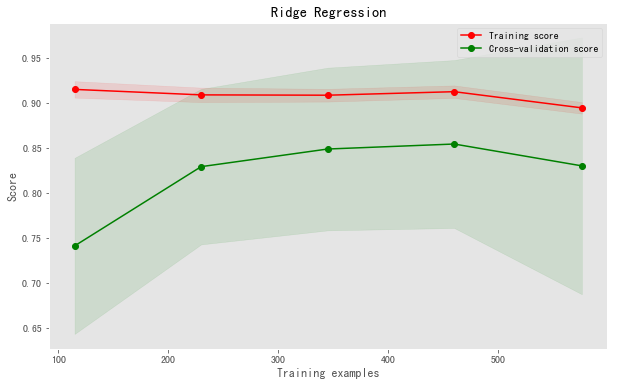

In [14]:
cv = KFold(n_splits=10, random_state=None, shuffle=True)
estimator = Ridge(alpha=1)

plot_learning_curve(estimator, "Ridge Regression", X_std, y, cv=cv, train_sizes=np.linspace(0.2, 1.0, 5))

# 高次方項

In [15]:
ridge = Ridge(alpha=1)
ridge.fit(X_train_poly, y_train)

print('各變項參數:', ridge.coef_)
print("MSE: %.2f" % np.mean((ridge.predict(X_test_poly) - y_test) ** 2))
print("R Square:",ridge.score(X_test_poly, y_test))

各變項參數: [[  0.00000000e+00   1.80010346e+03   3.99169628e+01   8.32349903e+02
    2.05142242e+01  -1.04861202e+01   1.80037248e+01  -1.04297264e+02
   -1.42077672e+02  -6.17409721e+00   6.17409721e+00   3.02059137e+00
    1.08480118e+00   9.90977732e-01   4.25884299e-01   8.68156610e-01
   -1.97143628e-01   2.25923284e-01   1.22624308e-01   4.13974939e-01
    7.79759018e-01  -1.79529531e+00  -4.19260418e-01  -2.57797828e+00
    2.06915847e+01  -7.72565830e+00   7.15308702e+02   2.98806214e+00
   -1.01876046e+01   9.22802844e+00  -1.85052014e+01  -1.18921859e+01
   -1.97306665e+01   1.97306665e+01   1.14646518e+01   2.58633546e+01
    1.05183291e+01  -1.42820837e+01  -1.04276001e+01  -5.28316142e+00
    5.55165233e+00  -1.59340748e+01   8.26334742e+00   2.55387288e+01
   -1.75121819e+01  -9.78254901e+00   2.24662793e+00  -4.88863242e+00
    4.86358287e+01   5.19185141e-01  -1.11771801e+01  -2.69628705e+00
    1.14448809e+01  -1.29562393e+01   8.55276080e+00  -8.55276080e+00
    9.7998284

<module 'matplotlib.pyplot' from '/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

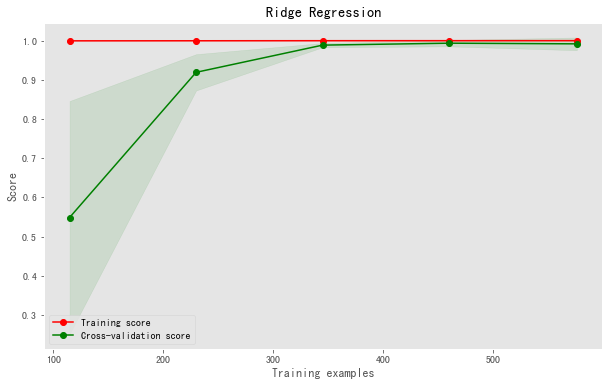

In [16]:
from sklearn.model_selection import KFold

cv = KFold(n_splits=10, random_state=None, shuffle=True)
estimator = Ridge(alpha=1)

plot_learning_curve(estimator, "Ridge Regression", X_poly, y, cv=cv, train_sizes=np.linspace(0.2, 1.0, 5))

# LASSO: L1 正規化

# 多變項

In [17]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=1)
lasso.fit(X_train_std, y_train)

print('各變項參數:', lasso.coef_)
print("MSE: %.2f" % np.mean((lasso.predict(X_test_std) - y_test.values.ravel()) ** 2)) #.values.ravel()把矩陣轉成一維
print("R Square:",lasso.score(X_test_std, y_test))

各變項參數: [  2.43380466e+03  -2.39919474e+02   8.94300888e+02  -7.39422484e+01
  -2.34358929e+01   1.43439033e+01  -5.41401716e+02   7.08139904e+02
   1.90961761e+02  -4.06024420e-15   2.89243700e+01   0.00000000e+00
  -1.45824721e+00  -9.92619025e+01  -2.45231041e+01   7.11004818e+00
   8.31556095e+00   1.36812641e+02  -3.40793052e+01  -2.68276919e+01
   3.24759599e+01  -6.20183041e+01   5.19764174e+01]
MSE: 565650.45
R Square: 0.846474111334


<module 'matplotlib.pyplot' from '/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

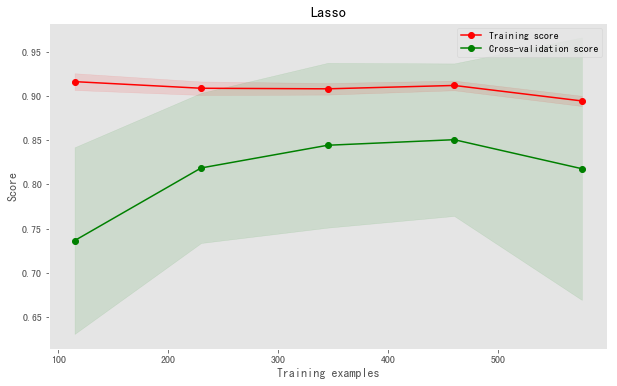

In [18]:
cv = KFold(n_splits=10, random_state=None, shuffle=True)
estimator = Lasso(alpha=1)

plot_learning_curve(estimator, "Lasso", X_std, y, cv=cv, train_sizes=np.linspace(0.2, 1.0, 5))

# 高次方項

In [19]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=10)
lasso.fit(X_train_poly, y_train)

print('各變項參數:', lasso.coef_)
print("MSE: %.2f" % np.mean((lasso.predict(X_test_poly) - y_test.values.ravel()) ** 2)) #.values.ravel()把矩陣轉成一維
print("R Square:",lasso.score(X_test_poly, y_test))

各變項參數: [  0.00000000e+00   1.83857008e+03   9.78611717e+00   8.26225401e+02
   2.02950725e+00   0.00000000e+00   2.81205242e+00  -2.81841363e+01
  -9.04974930e+01   3.62582032e-01  -8.93253725e-14  -0.00000000e+00
  -0.00000000e+00   0.00000000e+00  -0.00000000e+00   0.00000000e+00
  -0.00000000e+00   0.00000000e+00   0.00000000e+00  -0.00000000e+00
   0.00000000e+00  -0.00000000e+00   0.00000000e+00  -0.00000000e+00
   1.26982016e+01  -0.00000000e+00   7.53627111e+02  -0.00000000e+00
  -0.00000000e+00   0.00000000e+00   0.00000000e+00  -0.00000000e+00
  -0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00  -6.89671901e+00   0.00000000e+00  -0.00000000e+00
   0.00000000e+00  -0.00000000e+00  -0.00000000e+00   0.00000000e+00
  -0.00000000e+00   0.00000000e+00  -0.00000000e+00  -0.00000000e+00
   0.00000000e+00  -0.00000000e+00  -0.00000000e+00   0.00000000e+00
  -0.00000000e+00   0.00000000e+00  -0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of

<module 'matplotlib.pyplot' from '/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

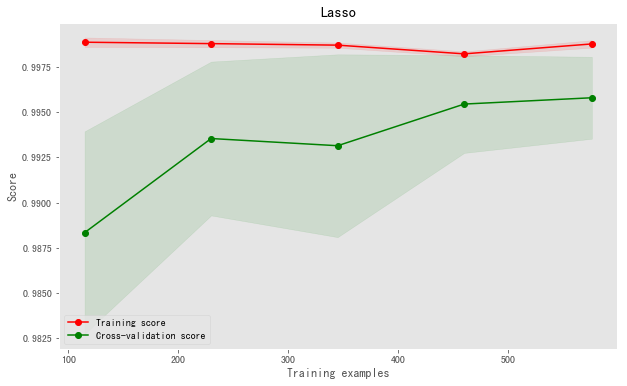

In [20]:
cv = KFold(n_splits=10, random_state=None, shuffle=True)
estimator = Lasso(alpha=10)

plot_learning_curve(estimator, "Lasso", X_poly, y, cv=cv, train_sizes=np.linspace(0.2, 1.0, 5))

# Elastic Net: L1+L2 正規化

In [21]:
from sklearn.linear_model import ElasticNet

elastic = ElasticNet(alpha=1)
elastic.fit(X_train_std, y_train)

print('各變項參數:', elastic.coef_)
print("MSE: %.2f" % np.mean((elastic.predict(X_test_std) - y_test.values.ravel()) ** 2))
print("R Square:",elastic.score(X_test_std, y_test))

各變項參數: [  9.78971706e+02   3.61955016e+02   6.06228197e+02   7.97673525e+00
  -6.36617955e+01   1.87365294e+01   2.09664478e+02   5.78166738e+02
  -7.47255084e+01   7.47201758e+01  -5.08375042e+00   1.22920432e+01
   5.58649269e+01  -2.33026700e+01  -6.16178847e+01  -6.64645461e+01
   9.00849569e+00   1.38492748e+02   9.17861070e-01   6.10991825e+01
  -9.22227160e+01   1.66409934e+01  -2.20688090e+00]
MSE: 818002.88
R Square: 0.777981933737
